# Portfolio Risk Analysis and Diversification

This notebook extends the market risk analysis to a multi-asset portfolio.
The objective is to evaluate portfolio-level risk, diversification effects,
and the impact of asset allocation on overall risk exposure.

The analysis reflects standard portfolio risk workflows used in financial institutions.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
from scipy.stats import norm

In [4]:
tickers = ["AAPL", "MSFT", "GOOGL", "SPY"]
prices = yf.download(tickers,start="2018-01-01",end="2024-01-01",auto_adjust=True,progress=False)["Close"]
prices = prices.dropna()
prices.head()

Ticker,AAPL,GOOGL,MSFT,SPY
Date,,,,
2018-01-02,40.341881,53.258095,79.050385,237.208176
2018-01-03,40.334873,54.166733,79.418259,238.708618
2018-01-04,40.522221,54.377140,80.117279,239.714752
2018-01-05,40.983566,55.098190,81.110558,241.312241
2018-01-08,40.831348,55.292725,81.193344,241.753418


In [5]:
returns = np.log(prices / prices.shift(1)).dropna()
returns.head()

Ticker,AAPL,GOOGL,MSFT,SPY
Date,,,,
2018-01-03,-0.000174,0.016917,0.004643,0.006306
2018-01-04,0.004634,0.003877,0.008763,0.004206
2018-01-05,0.011321,0.013173,0.012322,0.006642
2018-01-08,-0.003721,0.003524,0.001020,0.001827
2018-01-09,-0.000114,-0.001275,-0.000680,0.002261


In [6]:
num_assets = len(tickers)
weights = np.array([1 / num_assets] * num_assets)
weights

array([0.25, 0.25, 0.25, 0.25])

In [7]:
portfolio_return = returns.dot(weights)
portfolio_mean = portfolio_return.mean()
portfolio_volatility = portfolio_return.std()
portfolio_mean, portfolio_volatility

(np.float64(0.000783426634617107), np.float64(0.01619857489880392))

In [8]:
correlation_matrix = returns.corr()
correlation_matrix

Ticker,AAPL,GOOGL,MSFT,SPY
Ticker,,,,
AAPL,1.000000,0.676889,0.751705,0.797956
GOOGL,0.676889,1.000000,0.768711,0.769968
MSFT,0.751705,0.768711,1.000000,0.830466
SPY,0.797956,0.769968,0.830466,1.000000


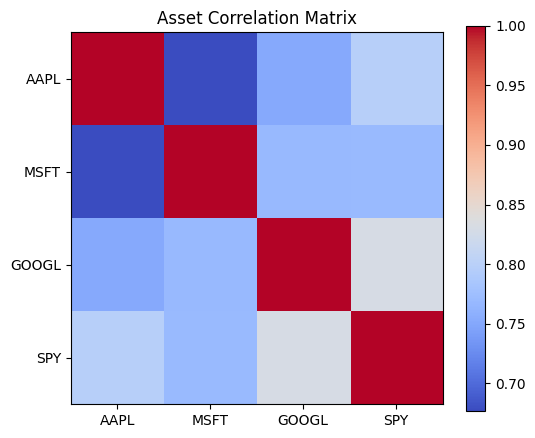

In [9]:
plt.figure(figsize=(6, 5))
plt.imshow(correlation_matrix, cmap="coolwarm")
plt.colorbar()
plt.xticks(range(len(tickers)), tickers)
plt.yticks(range(len(tickers)), tickers)
plt.title("Asset Correlation Matrix")
plt.show()

In [10]:
confidence_level = 0.95
z_score = norm.ppf(1 - confidence_level)
portfolio_var = portfolio_mean + z_score * portfolio_volatility
portfolio_var

np.float64(-0.0258608580391256)

In [11]:
portfolio_losses = portfolio_return[portfolio_return <= portfolio_var]
portfolio_cvar = portfolio_losses.mean()
portfolio_cvar

np.float64(-0.03931063751848355)

In [12]:
asset_volatility = returns.std()
comparison = pd.DataFrame({"Asset Volatility": asset_volatility,"Portfolio Volatility": portfolio_volatility})
comparison

,Asset Volatility,Portfolio Volatility
Ticker,,
AAPL,0.019965,0.016199
GOOGL,0.019696,0.016199
MSFT,0.018980,0.016199
SPY,0.012894,0.016199


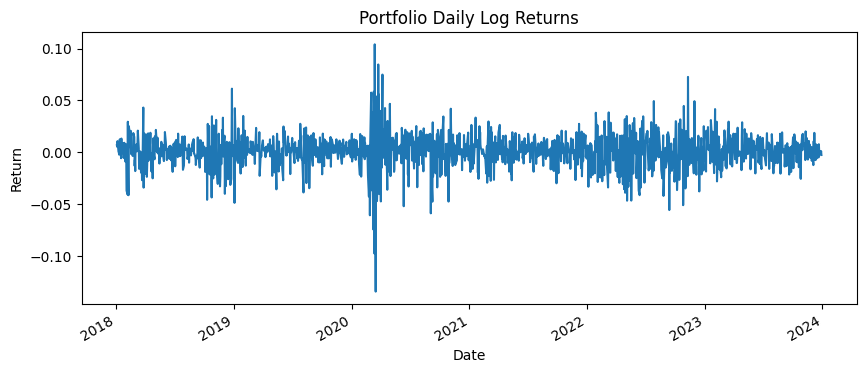

In [13]:
portfolio_return.plot(figsize=(10, 4))
plt.title("Portfolio Daily Log Returns")
plt.xlabel("Date")
plt.ylabel("Return")
plt.show()

## Interpretation of Results
- Portfolio volatility is lower than the volatility of individual assets,
  reflecting the benefits of diversification.
- Correlation between assets plays a critical role in portfolio risk reduction.
- Portfolio-level VaR and CVaR provide a more realistic measure of risk
  for investment decision-making than single-asset metrics.

## Final Remarks
This notebook completes the portfolio risk analysis by integrating individual asset behavior,correlations, and allocation effects.
The results highlight the importance of diversification and portfolio-level risk metrics
in professional risk management and investment analysis contexts.